In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings

from sklearn.model_selection import train_test_split
import tensorflow as tf

C:\Users\13936\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.facecolor'] = 'w'

In [29]:
## 数据加载
path = "datas/iris.data"
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'cla']
df = pd.read_csv(path, header=None, names=names)
df.head(2).append(df.tail(2))

,sepal length,sepal width,petal length,petal width,cla
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [30]:
df['cla'].value_counts() # 三类 ，每类50个

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: cla, dtype: int64

In [31]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['cla'] = le.fit_transform(df['cla'])

In [32]:
labels = df.pop('cla')

In [48]:
x_train, x_valid, y_train, y_valid = train_test_split(df, labels, test_size=0.2, random_state=1996)

In [49]:
train_data = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))
valid_data = tf.data.Dataset.from_tensor_slices((x_valid.values, y_valid.values))

In [50]:
train_data = train_data.shuffle(len(x_train)).batch(1)
valid_data = valid_data.batch(1)

In [73]:
base_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(df.shape[1], )),
    tf.keras.layers.Dense(16, activation='relu'), 
    tf.keras.layers.Dense(3, activation='softmax')
])

In [74]:
base_model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [75]:
base_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 51        
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [76]:
epoch = 20
history = base_model.fit(
    train_data,
    epochs = epoch,
    validation_data = valid_data
)

Epoch 1/20
120/120 [==============================] - 1s 8ms/step - loss: 1.2763 - sparse_categorical_accuracy: 0.4000 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/20
120/120 [==============================] - 0s 4ms/step - loss: 0.7682 - sparse_categorical_accuracy: 0.8000 - val_loss: 0.6501 - val_sparse_categorical_accuracy: 0.8333
Epoch 3/20
120/120 [==============================] - 0s 3ms/step - loss: 0.5920 - sparse_categorical_accuracy: 0.8333 - val_loss: 0.4649 - val_sparse_categorical_accuracy: 0.8333
Epoch 4/20
120/120 [==============================] - 0s 3ms/step - loss: 0.4607 - sparse_categorical_accuracy: 0.8667 - val_loss: 0.3768 - val_sparse_categorical_accuracy: 0.9333
Epoch 5/20
120/120 [==============================] - 0s 4ms/step - loss: 0.3535 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.3255 - val_sparse_categorical_accuracy: 0.8667
Epoch 6/20
120/120 [==============================] - 0s 4ms/step - loss: 0.3113 - sparse_ca

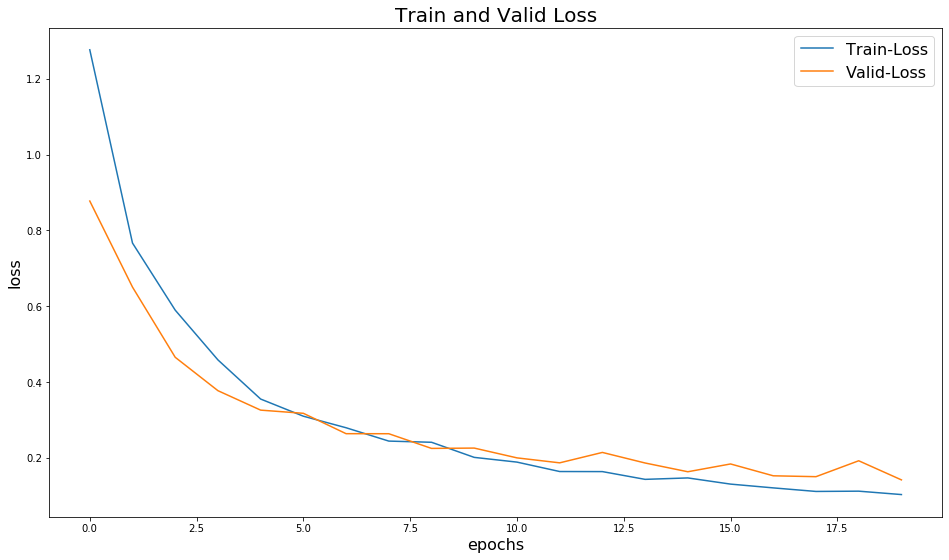

In [82]:
plt.figure(figsize=(16, 9))
plt.plot(range(epoch), history.history['loss'], label='Train-Loss')
plt.plot(range(epoch), history.history['val_loss'], label='Valid-Loss')
plt.xlabel('epochs', fontsize=16)
plt.ylabel('loss', fontsize=16)
plt.legend(loc=0, fontsize=16)
plt.title('Train and Valid Loss', fontsize=20)
plt.show()